In [25]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

### Import Data Set & Normalize
--- 
we have imported the famoous mnist dataset, it is a 28x28 gray-scale hand written digits dataset. we have loaded the dataset, split the dataset. we also need to normalize the dataset. The original dataset has pixel value between 0 to 255. we have normalized it to 0 to 1. 

In [26]:
import keras
from keras.datasets import mnist # 28x28 image data written digits 0-9
from keras.utils import normalize

#print(keras.__version__)

#split train and test dataset 
(x_train, y_train), (x_test,y_test) = mnist.load_data()

#normalize data 
x_train = normalize(x_train, axis=1)
x_test = normalize(x_test, axis=1)

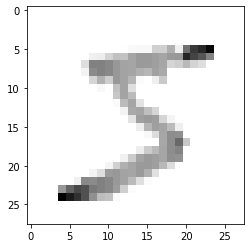

In [27]:
import matplotlib.pyplot as plt

plt.imshow(x_train[0], cmap=plt.cm.binary)
plt.show()
#print(x_train[0])

## Specify Architecture: 
--- 
we have specified our model architecture. added commonly used densely-connected neural network. For the output node we specified our activation function **softmax** it is a probability distribution function. 


In [28]:
from keras.models import Sequential
from keras.layers import Flatten
from keras.layers import Dense 

# created model 
model = Sequential()

# flatten layer so it is operable by this layer  
model.add(Flatten())

# regular densely-connected NN layer.
#layer 1, 128 node 
model.add(Dense(128, activation='relu'))

#layer 2, 128 node 
model.add(Dense(128, activation='relu'))

#output layer, since it is probability distribution we will use 'softmax'
model.add(Dense(10, activation='softmax'))

### Compile
--- 
we have compiled the model with earlystopping callback. when we see there are no improvement on accuracy we will stop compiling. 

In [29]:
from keras.callbacks import EarlyStopping

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics = ['accuracy'])

#stop when see model not improving 
early_stopping_monitor = EarlyStopping(monitor='val_loss', patience=2)


### Fit
---
Fit the model with train data, with epochs 10. 


In [30]:
model.fit(x_train, y_train, epochs=10, callbacks=[early_stopping_monitor], validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 5s 89us/step - loss: 0.2654 - accuracy: 0.9219 - val_loss: 0.1370 - val_accuracy: 0.9569
Epoch 2/10
60000/60000 [==============================] - 5s 85us/step - loss: 0.1074 - accuracy: 0.9663 - val_loss: 0.1020 - val_accuracy: 0.9674
Epoch 3/10
60000/60000 [==============================] - 5s 83us/step - loss: 0.0750 - accuracy: 0.9763 - val_loss: 0.0866 - val_accuracy: 0.9732
Epoch 4/10
60000/60000 [==============================] - 5s 84us/step - loss: 0.0539 - accuracy: 0.9823 - val_loss: 0.1024 - val_accuracy: 0.9690
Epoch 5/10
60000/60000 [==============================] - 5s 85us/step - loss: 0.0411 - accuracy: 0.9862 - val_loss: 0.0824 - val_accuracy: 0.9747
Epoch 6/10
60000/60000 [==============================] - 5s 83us/step - loss: 0.0322 - accuracy: 0.9891 - val_loss: 0.1017 - val_accuracy: 0.9702
Epoch 7/10
60000/60000 [==============================] - 5s 84us/st

### Evaluate
---
Evaluate the accuracy of the model. 

In [31]:
val_loss, val_acc = model.evaluate(x_test,y_test)
print(val_loss, val_acc)

10000/10000 [==============================] - 0s 32us/step
0.09387863340429176 0.974399983882904


### Save
--- 
Save the model and show summary. 

In [32]:
model.save('mnist_digit.h5')
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_8 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_9 (Dense)              (None, 10)                1290      
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


### Load
----
Load the model. 

In [33]:
from keras.models import load_model

new_model = load_model('mnist_digit.h5')

### Predict 
----
Here our model predicted the probability distribution, we have to covnert it to classifcation/label.

In [34]:
predict = new_model.predict([x_test])

#return the probability 
print(predict)

[[4.2676600e-14 3.0285038e-11 4.8696002e-11 ... 1.0000000e+00
  3.2324130e-12 5.4897120e-10]
 [2.2162140e-12 4.6030357e-07 9.9999952e-01 ... 5.1144473e-13
  8.7472928e-12 1.5468627e-16]
 [1.1383704e-13 9.9997509e-01 1.1891178e-08 ... 1.7382994e-05
  7.5184744e-06 8.6839680e-10]
 ...
 [5.1449442e-15 2.2787440e-11 3.4375176e-11 ... 1.5216089e-07
  3.9822585e-09 4.9883429e-06]
 [3.9062195e-12 6.8857619e-14 9.2085549e-12 ... 4.1195853e-12
  2.0591863e-03 3.0217221e-13]
 [1.3771667e-10 2.4271757e-10 5.0005507e-11 ... 3.9432331e-15
  1.9255349e-08 1.2746119e-13]]


In [35]:
print(predict[1].argmax(axis=-1))

2


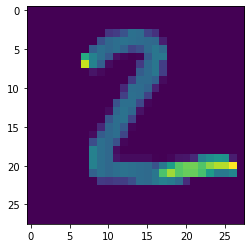

In [36]:
plt.imshow(x_test[1])
plt.show()